In [1]:
import velvetvae as vt

# general packages
import numpy as np
import pandas as pd
import torch
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from IPython.display import clear_output

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Global seed set to 0
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
g = lambda k,p,t: (-np.log(1 - (k/p))) / t
a = lambda g,N,p,t: (g*N)/(p*(1-np.exp(-g*t)))
v = lambda a,g,X: a - g*X

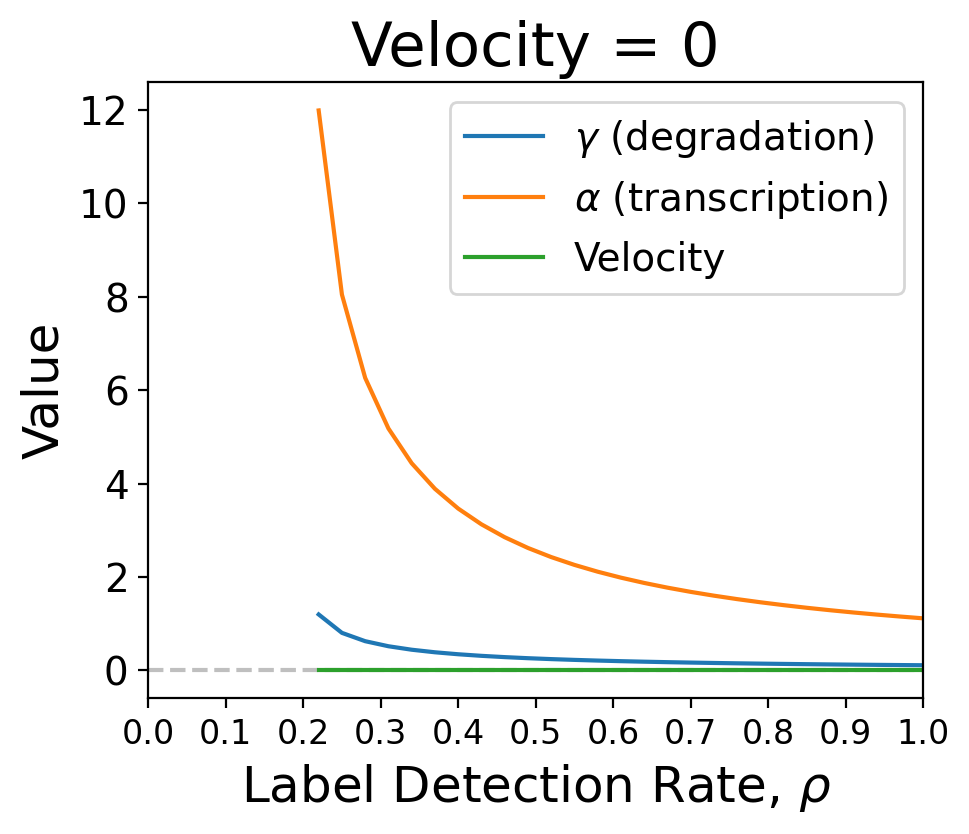

In [3]:
t = 2.0
N = 2.0
X = 10.0
k = 0.2

gs, az, vs = [], [], []

ps = np.linspace(0.1,1.0,31)

for p in ps:
    gi = g(k,p,t)
    gs.append(gi)
    ai = a(gi,N,p,t)
    az.append(ai)
    vi = v(ai,gi,X)
    vs.append(vi)

    
plt.figure(figsize=(5,4),dpi=200)
plt.plot(ps,gs,label=r'$\gamma$ (degradation)')
plt.plot(ps,az,label=r'$\alpha$ (transcription)')
plt.plot(ps,vs, label='Velocity')
plt.legend(fontsize=14)
plt.xlim((0,1))
plt.xticks(np.linspace(0,1,11), fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(r"Label Detection Rate, $\rho$", fontsize=18)
plt.ylabel(r"Value", fontsize=18)
plt.title("Velocity = 0", fontsize=22)
plt.axhline(y=0, color='grey', linestyle='--', zorder=-19., alpha=0.5)
plt.savefig("12_rho1.png", bbox_inches='tight', dpi=300)
plt.show()

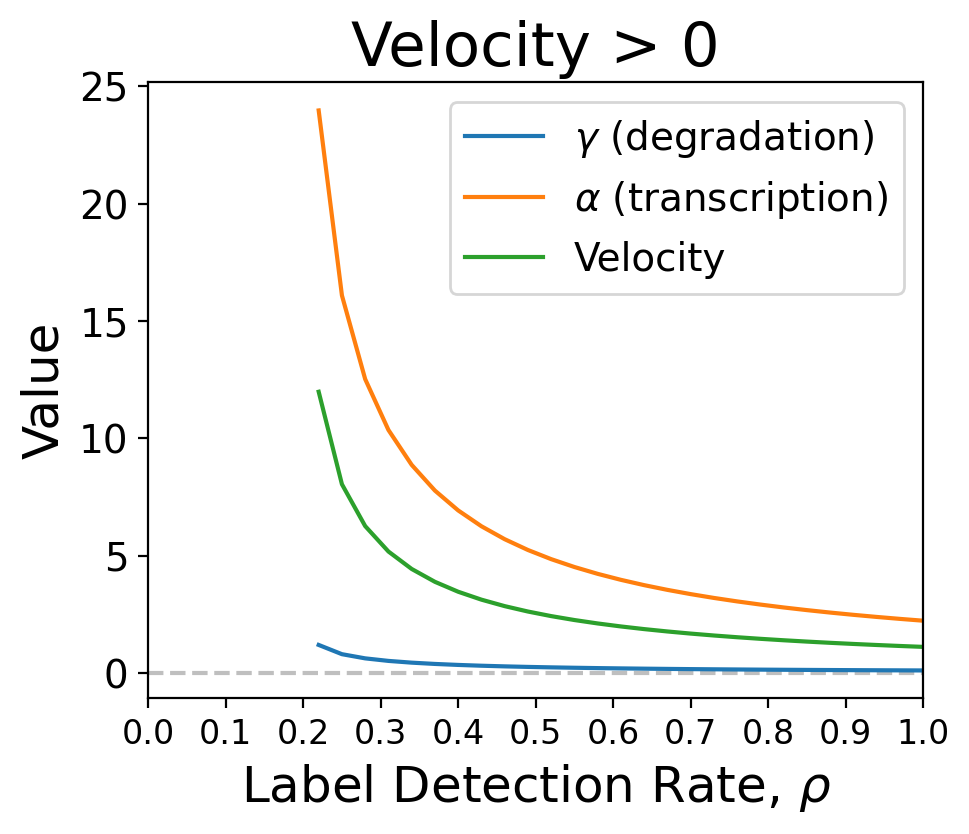

In [4]:
t = 2.0
N = 4.0
X = 10.0
k = 0.2

gs, az, vs = [], [], []

ps = np.linspace(0.1,1.0,31)

for p in ps:
    gi = g(k,p,t)
    gs.append(gi)
    ai = a(gi,N,p,t)
    az.append(ai)
    vi = v(ai,gi,X)
    vs.append(vi)

    
plt.figure(figsize=(5,4),dpi=200)
plt.plot(ps,gs,label=r'$\gamma$ (degradation)')
plt.plot(ps,az,label=r'$\alpha$ (transcription)')
plt.plot(ps,vs, label='Velocity')
plt.legend(fontsize=14)
plt.xlim((0,1))
plt.xticks(np.linspace(0,1,11), fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(r"Label Detection Rate, $\rho$", fontsize=18)
plt.ylabel(r"Value", fontsize=18)
plt.title("Velocity > 0", fontsize=22)
plt.axhline(y=0, color='grey', linestyle='--', zorder=-19., alpha=0.5)
plt.savefig("12_rho2.png", bbox_inches='tight', dpi=300)
plt.show()

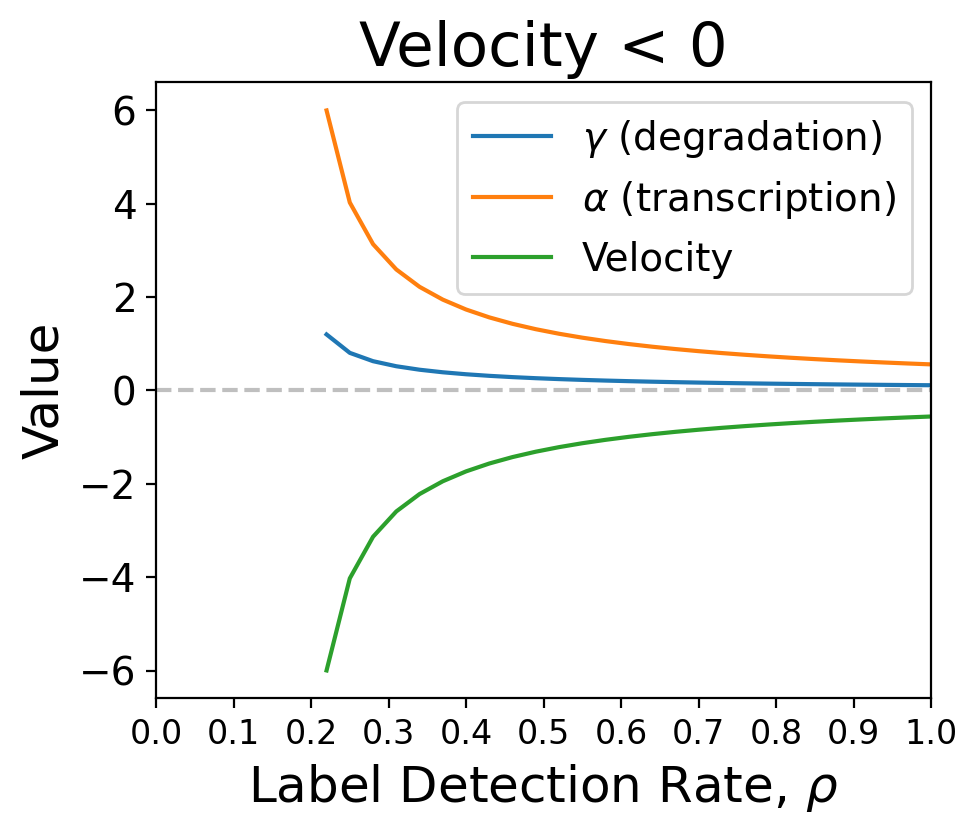

In [5]:
t = 2.0
N = 1.0
X = 10.0
k = 0.2

gs, az, vs = [], [], []

ps = np.linspace(0.1,1.0,31)

for p in ps:
    gi = g(k,p,t)
    gs.append(gi)
    ai = a(gi,N,p,t)
    az.append(ai)
    vi = v(ai,gi,X)
    vs.append(vi)

    
plt.figure(figsize=(5,4),dpi=200)
plt.plot(ps,gs,label=r'$\gamma$ (degradation)')
plt.plot(ps,az,label=r'$\alpha$ (transcription)')
plt.plot(ps,vs, label='Velocity')
plt.legend(fontsize=14)
plt.xlim((0,1))
plt.xticks(np.linspace(0,1,11), fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(r"Label Detection Rate, $\rho$", fontsize=18)
plt.ylabel(r"Value", fontsize=18)
plt.title("Velocity < 0", fontsize=22)
plt.axhline(y=0, color='grey', linestyle='--', zorder=-19., alpha=0.5)
plt.savefig("12_rho3.png", bbox_inches='tight', dpi=300)
plt.show()

In [12]:
t = 2.0
N = 4.0
X = 10.0
k = 0.2
gs, az, vs = [], [], []
ps = np.linspace(0.1,1.0,31)

In [17]:
np.array([0.0125,0.025,0.05,0.1,0.2,0.4,0.8])*10

array([0.125, 0.25 , 0.5  , 1.   , 2.   , 4.   , 8.   ])

In [27]:
num = 9

res = []
for n in np.linspace(1,9,num):
    vs = []
    for p in ps:
        gi = g(k,p,t)
        ai = a(gi,n,p,t)
        vi = v(ai,gi,X)
        vs.append(vi)
    res.append(np.array(vs))

In [28]:
def get_inferno_colors(n):
    inferno = plt.cm.get_cmap('inferno', n)  # Get the inferno colormap with n divisions
    return [inferno(i) for i in range(n)]

colors = get_inferno_colors(num)

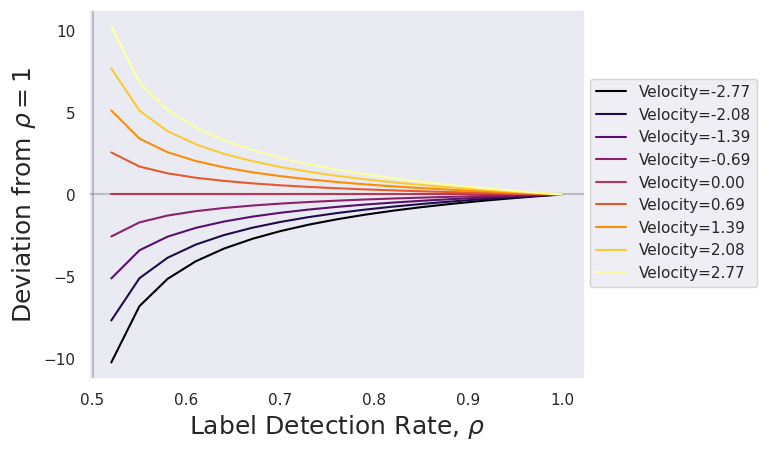

In [29]:
sns.set()
for r, c in zip(res, colors):
    plt.plot(ps, r-r[-1], label=f'Velocity={r[-1]:.2f}', color=c)
plt.legend(loc=(1.01,0.25))
plt.grid(False)
plt.axhline(y=0,zorder=-10, color='black', alpha=0.2)
plt.axvline(x=0.5,zorder=-10, color='black', alpha=0.2)
plt.xlabel(r"Label Detection Rate, $\rho$", fontsize=18)
plt.ylabel(r"Deviation from $\rho=1$", fontsize=18)
# plt.savefig("12_rho4.png", bbox_inches='tight', dpi=300)
plt.show()

In [13]:
from scvelo.core import LinearRegression as scveloLR

In [14]:
adata0 = sc.read_h5ad('../SVM23/data/celltyped_adata.h5ad')


In [15]:
types = ['NMP']

adata = adata0[[ct in types for ct in adata0.obs.cell_annotation]]

genes = vt.pp.select_genes(
    adata,
    n_variable_genes=1000
)

adata = vt.pp.size_normalize(
    adata, 
    genes=genes, 
    total_layer='total', 
    new_layer='new',
    unsparsify=True
)


In [16]:
X = adata.layers['total']
N = adata.layers['new']
t = 2.0


In [17]:
g = lambda k,p,t: (-np.log(1 - (k/p))) / t
a = lambda g,N,p,t: (g*N)/(p*(1-np.exp(-g*t)))
v = lambda a,g,X: a - g*X
def k(X,N):
    lr = scveloLR(fit_intercept=False, percentile=[5, 95])
    lr.fit(X, N).coef_
    K = lr.coef_
    return np.clip(K, 0.01, 10)

In [18]:
K = k(X,N)
P = 1.0
G = g(K, P, t)
A = a(G,N,P,t)
V = v(A,G,X)

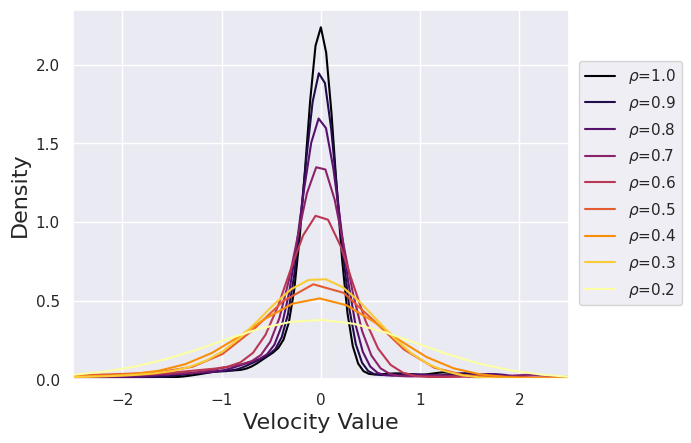

In [23]:
def get_inferno_colors(n):
    inferno = plt.cm.get_cmap('inferno', n)  # Get the inferno colormap with n divisions
    return [inferno(i) for i in range(n)]

colors = get_inferno_colors(9)
sns.set()
for P,c in zip(np.linspace(0.2,1,9)[::-1],colors):
    K = k(X,N)
    G = g(K, P, t)
    A = a(G,N,P,t)
    V = v(A,G,X)
    sns.kdeplot(V.flatten()[:1000], color=c, label=fr"$\rho$={P:.1f}")
plt.xlim(-2.5,2.5)
plt.legend(loc=(1.02,0.2))
plt.xlabel("Velocity Value", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.savefig("12_rho5.png", bbox_inches='tight', dpi=300)
plt.show()

0.5